<a href="https://colab.research.google.com/github/nayan-khemka/Machine-Learning-Data-Analytics-LAB/blob/main/20BCE1884_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [2]:
dataf = pd.read_csv('Persistent_vs_NonPersistent.csv')

In [3]:
dataf.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
print ("Rows     : " ,dataf.shape[0])
print ("Columns  : " ,dataf.shape[1])
print ("\nFeatures : \n" ,dataf.columns.tolist())

Rows     :  3424
Columns  :  69

Features : 
 ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_O

In [5]:
print ("\nMissing values :  ", dataf.isnull().any())


Missing values :   Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool


In [6]:
print ("\nUnique values :  \n",dataf.nunique())


Unique values :  
 Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64


In [7]:
dataf.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [8]:
dataf.value_counts('Persistency_Flag')

Persistency_Flag
Non-Persistent    2135
Persistent        1289
dtype: int64

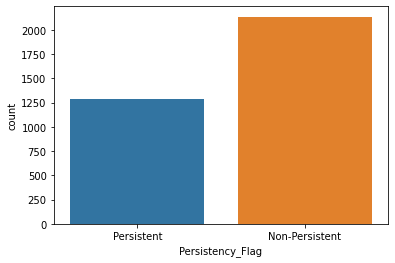

In [9]:
import seaborn as sns
sns.countplot(x="Persistency_Flag",data=dataf, dodge=True)

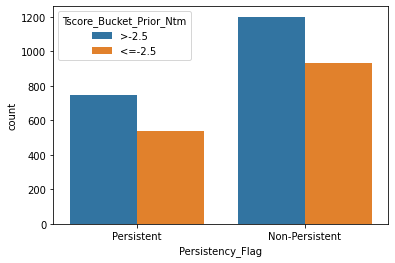

In [10]:
sns.countplot(x="Persistency_Flag",hue='Tscore_Bucket_Prior_Ntm', data=dataf)

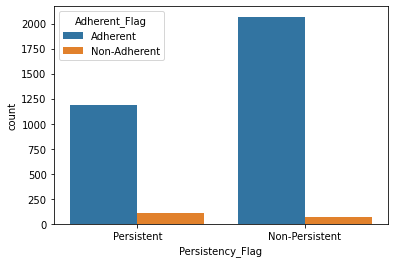

In [11]:
sns.countplot(x="Persistency_Flag",hue='Adherent_Flag', data=dataf)

In [12]:
X = dataf.drop(columns='Persistency_Flag')
y = dataf['Persistency_Flag']

In [13]:
print(X.shape)
print(y.shape)

(3424, 68)
(3424,)


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(np.ravel(y))
target

array([1, 0, 0, ..., 1, 0, 0])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        #Transforms columns of X specified in self.columns using LabelEncoder().
        #If no columns specified, transforms all columns in X.
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [16]:
New_dataF = MultiColumnLabelEncoder(columns = ['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls']).fit_transform(X)

In [17]:
New_dataF.head(10)

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5,2980,0,2,1,0,3,5,0,1,0,...,1,0,0,0,0,0,0,0,0,2
6,3091,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,3202,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
8,3313,0,2,1,0,3,5,0,1,0,...,1,0,0,0,0,0,0,0,0,1
9,1,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
##Important packages importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
train_X, test_X, train_y, test_y = train_test_split(New_dataF, target, test_size=0.3, random_state=42)

In [20]:
# Logistic Regression
# fit a model
model = LogisticRegression(solver='newton-cg')#, max_iter=3000, penalty='elasticnet',l1_ratio=1)
model.fit(train_X, train_y)

LogisticRegression(solver='newton-cg')

In [21]:
# Accuracy on Testing Dataset using Logistic Regression
score_LR = model.score(test_X, test_y)
print("Using Logistic Regression Model- Accuracy on Test Dataset is", score_LR*100, "%")

Using Logistic Regression Model- Accuracy on Test Dataset is 81.22568093385215 %


In [22]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(train_X, train_y)
predicted= support.predict(test_X)
score=accuracy_score(test_y,predicted)
print("Using Support Vector Machine Model- Accuracy on Test Dataset is", score*100, "%")

Using Support Vector Machine Model- Accuracy on Test Dataset is 74.5136186770428 %


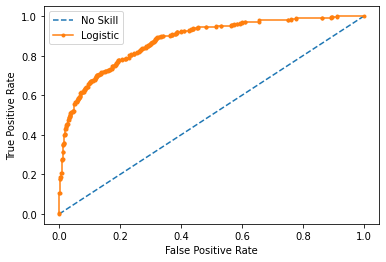

In [24]:
# predict probabilities
yhat = model.predict_proba(test_X)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(test_y, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
#Calculating ROC Area Under Curve
yhat = model.predict_proba(test_X)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(test_y, pos_probs)
print('Logistic ROC Area Under Curve %.3f' % roc_auc)

Logistic ROC Area Under Curve 0.878


In [26]:
print('Coefficients of all variables : ', model.coef_)

Coefficients of all variables :  [[-1.17454605e-04  2.74458856e-01 -6.15144995e-02  6.22682492e-02
   1.17148165e-01  1.00756505e-01  8.10093770e-03  2.29387847e-01
  -3.34775433e-01 -5.28214357e-01  1.77357930e-01  1.09025989e-02
   1.81401626e+00 -4.68712581e-01  2.44027182e-01  3.16298653e-01
  -2.65398176e-01 -3.20060276e-02 -2.77679621e-01 -1.03148208e-01
   3.44189732e-01  2.12869308e-01  4.97385127e-01  2.96470234e-01
   7.09743777e-01  4.76335589e-01  6.08916082e-01  7.28047370e-01
   3.01748348e-01  1.35622186e-01  1.07649098e+00  3.81515379e-01
   2.25547454e-01  6.64348740e-01  7.30282680e-02 -2.94599725e-01
   1.91137005e-01  3.02989337e-01 -2.85060772e-01 -3.20439656e-01
   3.51930857e-01  5.76705398e-02  4.44984054e-01  8.50126046e-02
   2.28692704e-01  4.51196868e-01  2.74197082e-01  7.94010800e-01
  -6.81280959e-01  0.00000000e+00  2.66480149e-01 -1.30081238e-01
   6.92830107e-01  6.06193505e-02  3.85063481e-01  3.36648850e-01
   4.30504327e-01  5.62585799e-01 -2.838614

In [27]:
print('Intercept of the model : ', model.intercept_)

Intercept of the model :  [-3.52067673]


In [28]:
confusion_matrix(target, model.predict(New_dataF))

array([[1904,  231],
       [ 370,  919]])

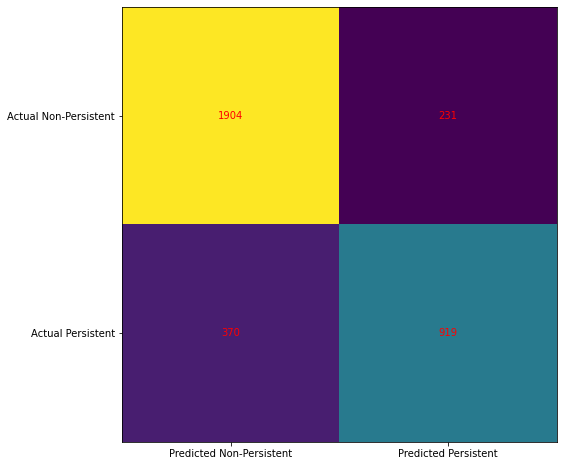

In [29]:
cm = confusion_matrix(target, model.predict(New_dataF))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Non-Persistent', 'Predicted Persistent'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Non-Persistent', 'Actual Persistent'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
print("FOR LOGISTIC REGRESSION:\n",classification_report(target, model.predict(New_dataF)))

FOR LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2135
           1       0.80      0.71      0.75      1289

    accuracy                           0.82      3424
   macro avg       0.82      0.80      0.81      3424
weighted avg       0.82      0.82      0.82      3424



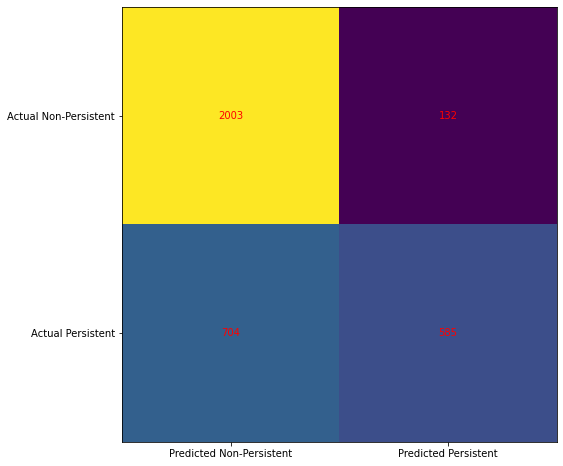

In [31]:
cm = confusion_matrix(target, support.predict(New_dataF))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Non-Persistent', 'Predicted Persistent'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Non-Persistent', 'Actual Persistent'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [32]:
print("FOR SVM:",classification_report(target, model.predict(New_dataF)))

FOR SVM:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2135
           1       0.80      0.71      0.75      1289

    accuracy                           0.82      3424
   macro avg       0.82      0.80      0.81      3424
weighted avg       0.82      0.82      0.82      3424

